In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from sklearn import datasets

sns.set(style="darkgrid")

%matplotlib inline

In [11]:
# Load dataset
data = datasets.load_boston()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target

data = X.copy()
data["target"]=y
column_names = X.columns

In [3]:
# Brief dataset exploration: shape and some head rows 
print("DataSet shape : {}".format(X.shape))
X.head()

DataSet shape : (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Some statistics
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


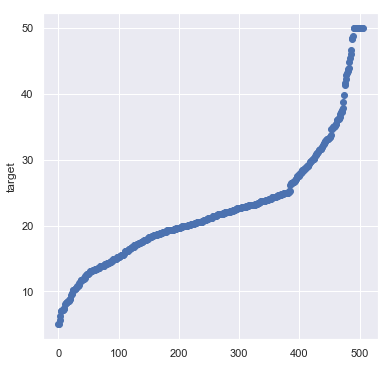

In [5]:
# Visualize target variable with scatter plot
plt.figure(figsize=(6,6))
plt.scatter(range(y.shape[0]), np.sort(y));
plt.ylabel("target");

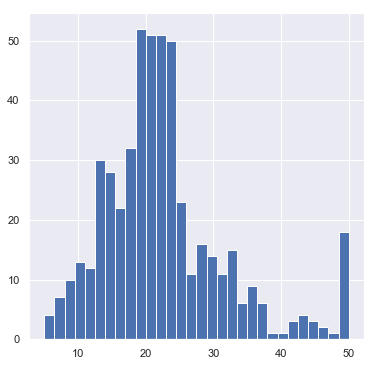

In [6]:
# Visualize with histogram
plt.figure(figsize=(6,6))
plt.hist(y, bins=30);

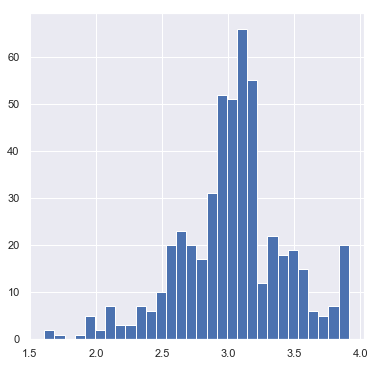

In [7]:
# Visualize log target
plt.figure(figsize=(6,6))
plt.hist(np.log(y), bins=30);

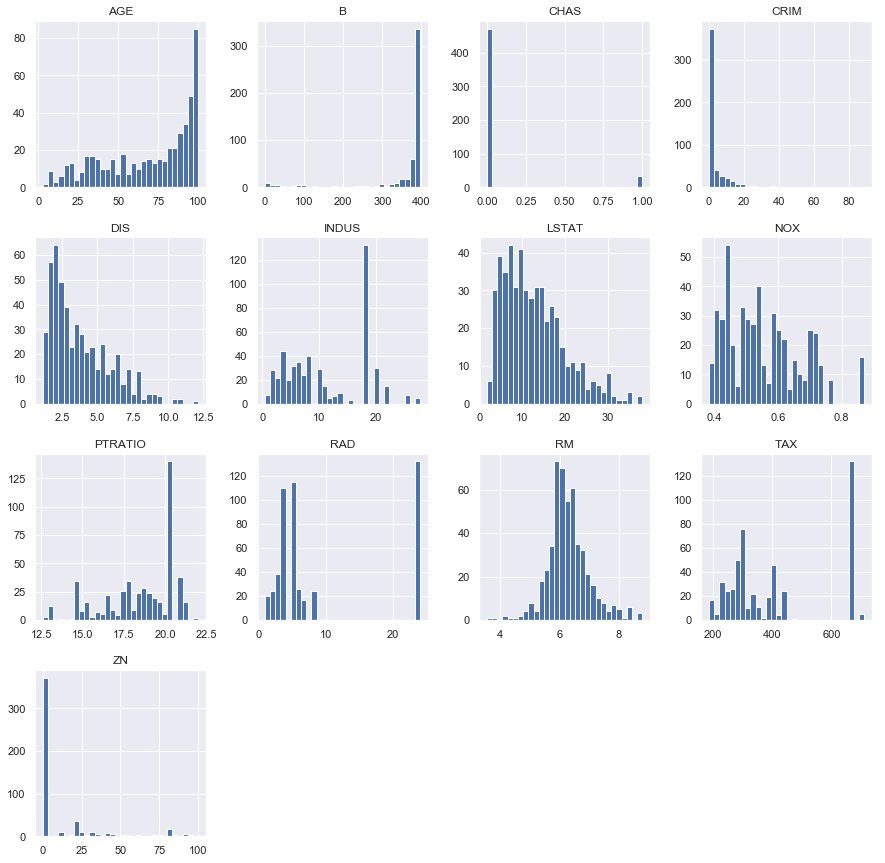

In [8]:
# Look on the features distribution
X.hist(bins=30,figsize=(15,15));

<Figure size 1800x1800 with 0 Axes>

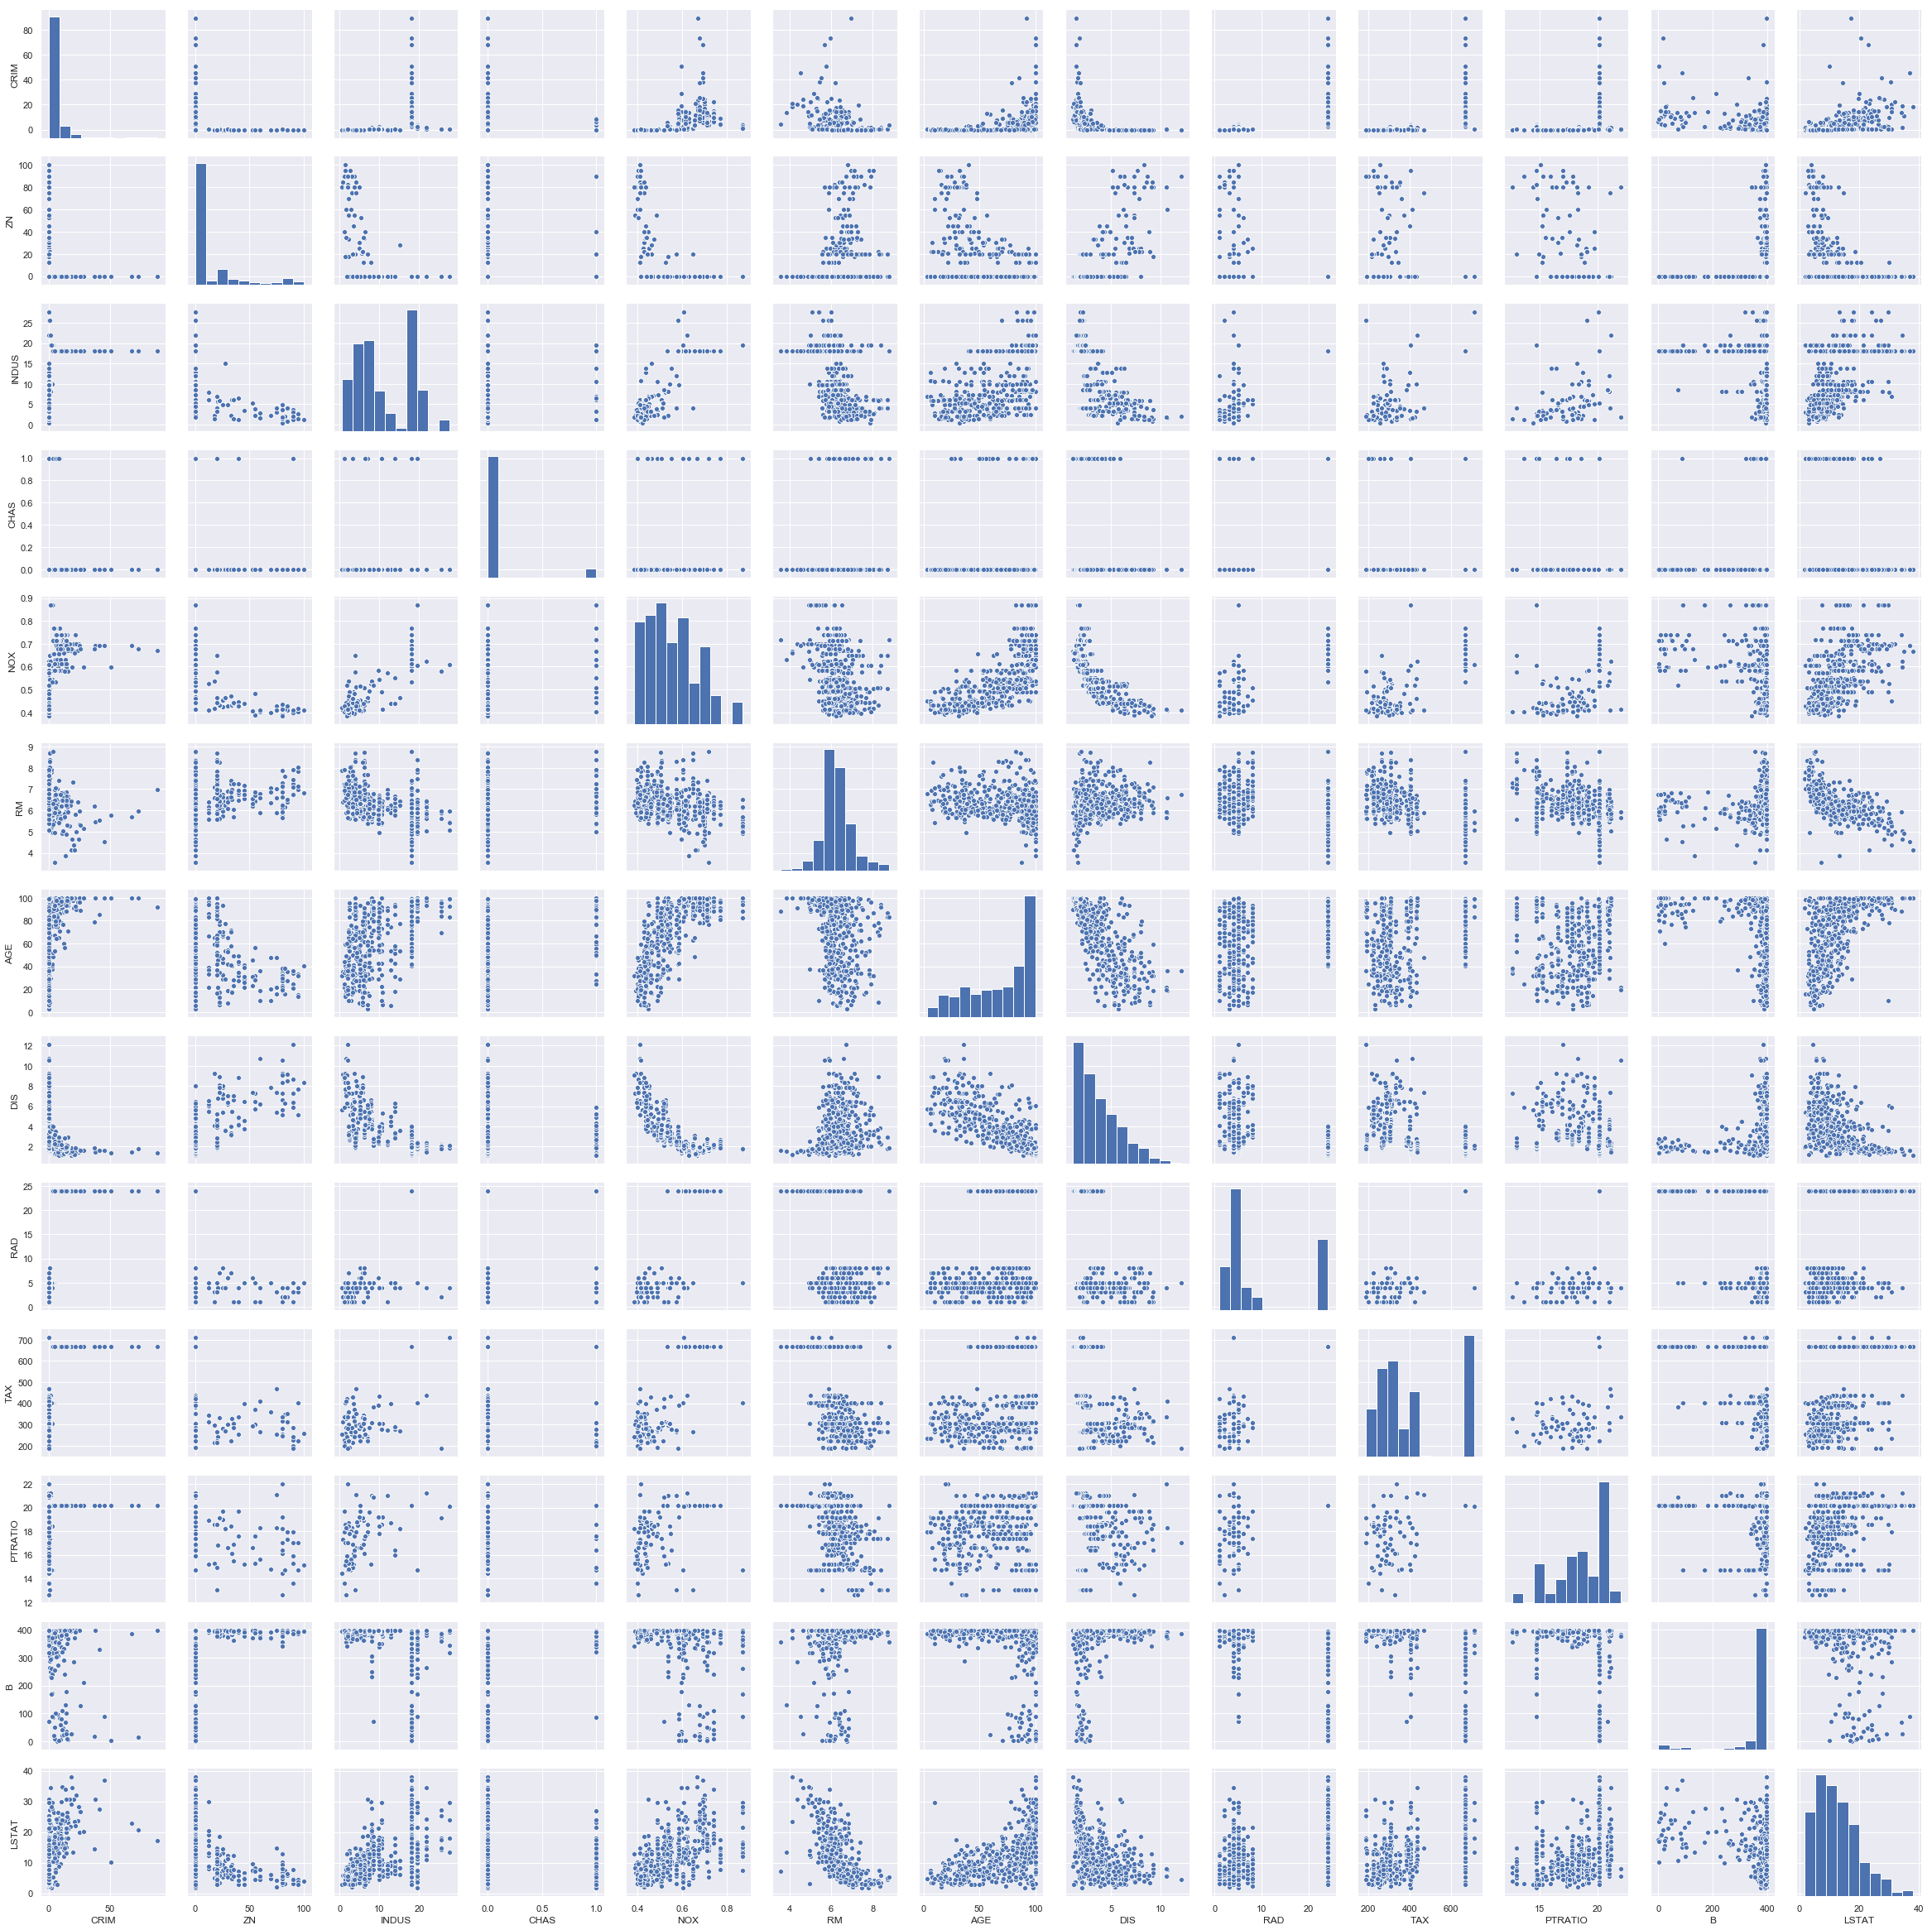

In [10]:
# Maybe you need to store this image :)
plt.figure(figsize=(25,25));
sns.pairplot(X);

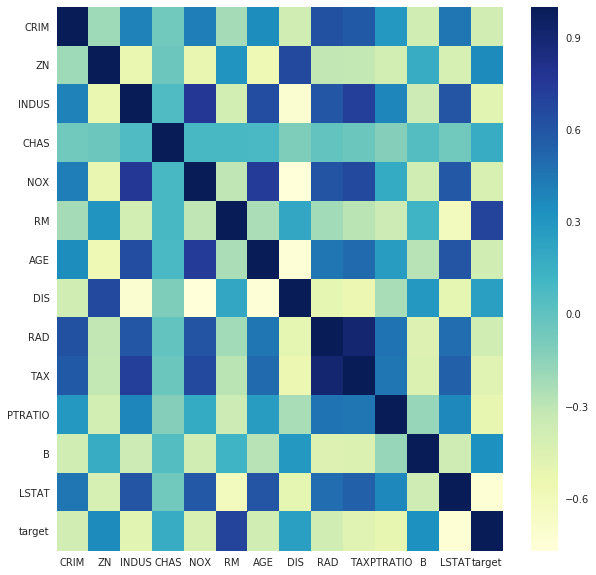

In [24]:
plt.figure(figsize=(10,10));
sns.heatmap(data.corr(), cmap="YlGnBu");

In [25]:
# Lets train linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale Data
scaler = StandardScaler()
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train);

# Compute Test Error
test_mse = mean_squared_error(lr.predict(X_test), y_test)
print("MSE on test : {}".format(test_mse))

MSE on test : 24.14727801419417


In [26]:
# Log target 
lr = LinearRegression()
lr.fit(X_train, np.log(y_train));
test_mse = mean_squared_error(np.exp(lr.predict(X_test)), y_test)
print("MSE on test : {}".format(test_mse))

MSE on test : 18.11604637626519


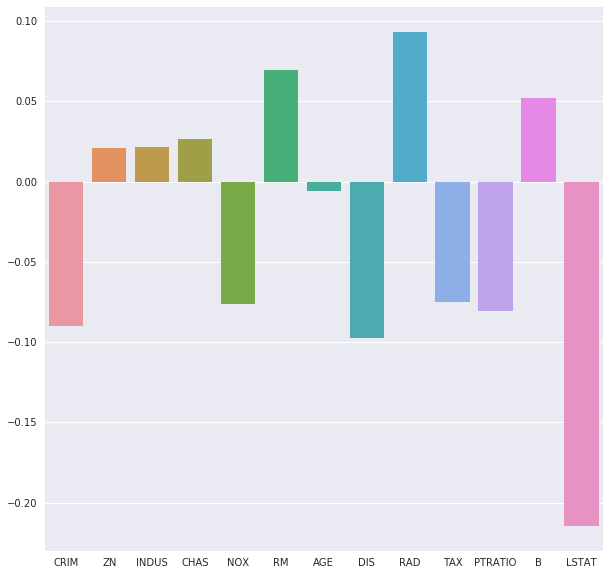

In [27]:
# Visualize model weights
plt.figure(figsize=(10, 10))
coeffs = lr.coef_
sns.barplot(x=column_names, y=coeffs);

# SVM

In [40]:
# Let's generate some synthetic data for classfication task
first_class_X = np.random.normal(size=(100,2), loc=0)
second_class_X = np.random.normal(size=(100,2), loc=4)

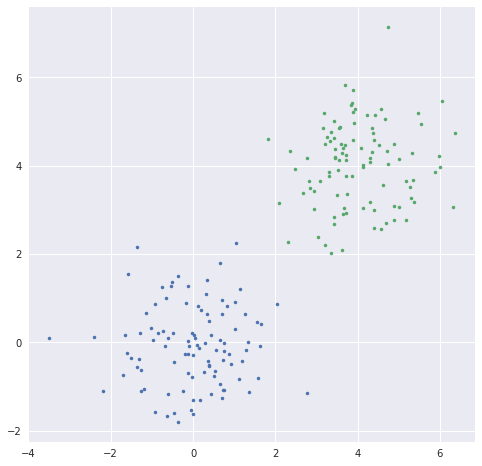

In [47]:
plt.figure(figsize=(8,8))
plt.plot(first_class_X[:,0], first_class_X[:,1], ".");
plt.plot(second_class_X[:,0], second_class_X[:,1], ".");

You can see that dataset - linear separable

In [76]:
# Create labels 
f_class_y = np.zeros(100)
s_class_y = np.ones(100)

In [77]:
# Concat data
X = np.concatenate([first_class_X, second_class_X])
y = np.concatenate([f_class_y, s_class_y])

In [123]:
# Split on train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel="linear", C=0.5)
svc.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
print("Accuracy on test data : {}".format(accuracy_score(y_test, svc.predict(X_test))))

Accuracy on test data : 1.0


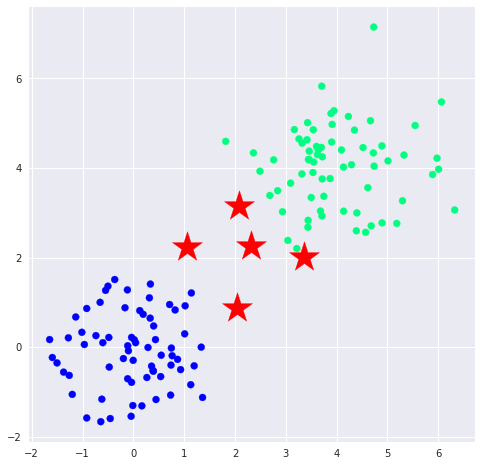

In [151]:
# Visualize support vectors
vectors = svc.support_vectors_

plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="winter");
plt.scatter(vectors[:,0], vectors[:,1], marker="*",s=10**3, c="red");